In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# New section

In [ ]:
class GaussianBandit():
  def __init__(self, m):
    self.m = m
    self.m_estimate = 0
    self.N = 0

  def pull(self):
    self.N += 1
    return np.random.normal(self.m)

  def update(self,r):
    step_size = 1/(self.N)
    self.m_estimate = self.m_estimate + step_size * (r - self.m_estimate)
    return

def best_action(q_values):

  Q = np.array(q_values)
  max_q = np.max(Q)
  return np.random.choice(np.where(q_values == max_q)[0])

In [ ]:
NUM_STEPS = 1000
BANDIT_MEANS = [2, 5, 8]

In [ ]:
EPSILONS = [0.0, 0.01, 0.1, 0.4]

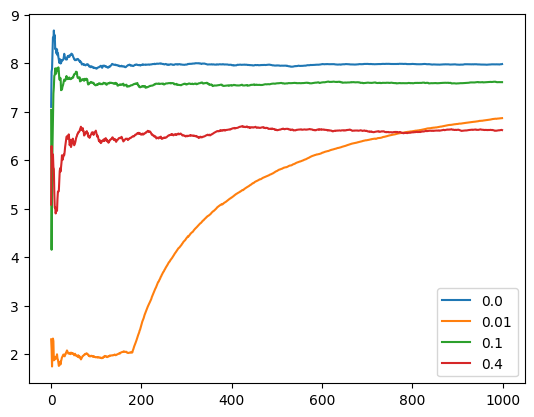

In [ ]:
fig, ax = plt.subplots()
for i,eps in enumerate(EPSILONS):

  bandits = [GaussianBandit(p) for p in BANDIT_MEANS]
  epg_rewards = []
  for trial in range(NUM_STEPS):

    q_values = [bandits[i].m_estimate for i in range(len(bandits))]
    a = best_action(q_values)

    if np.random.random()<eps:
      next_action = np.random.choice(len(bandits))
    else:
      next_action = a

    r = bandits[next_action].pull()
    bandits[next_action].update(r)
    epg_rewards.append(r)

  avg_rewards = [s/(n+1) for n,s in enumerate(np.cumsum(epg_rewards))]
  ax.plot(np.arange(NUM_STEPS), avg_rewards, label=eps)
  ax.legend()

In [ ]:
NUM_RUNS = 200

100%|██████████| 200/200 [00:09<00:00, 21.44it/s]


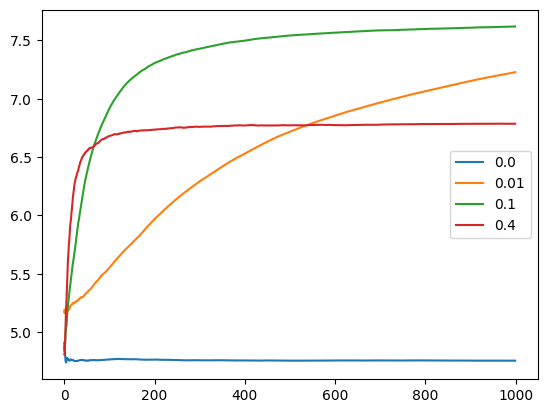

In [ ]:
fig, ax = plt.subplots()
for i,eps in enumerate(EPSILONS):

  rewards_array = np.zeros((NUM_RUNS,1000))

  for run in tqdm(range(NUM_RUNS)):

    bandits = [GaussianBandit(p) for p in BANDIT_MEANS]
    for trial in range(NUM_STEPS):

      q_values = [bandits[i].m_estimate for i in range(len(bandits))]
      a = best_action(q_values)

      if np.random.random()<eps:
        #Explore
        next_action = np.random.choice(len(bandits))
      else:
        #Exploit
        next_action = a

      r = bandits[next_action].pull()
      bandits[next_action].update(r)
      rewards_array[run,trial] = r

  eps_rewards = np.mean(rewards_array, axis =0)
  avg_rewards = [s/(n+1) for n,s in enumerate(np.cumsum(eps_rewards))]
  ax.plot(np.arange(NUM_STEPS), avg_rewards, label=eps)
ax.legend()

In [ ]:
rewards_array.shape

(200, 1000)